# Submission 2 - Intermediate

**Instructions**
- Fill out the 'Basic Information' and 'Simple Hypotheses - Findings / Insights' sections (replace the TODOs with your information)
  - If your visualization is interactive, create a short video that shows the interactivity (max. 3 min).
- Export the Jupyter notebook as a HTML file and save it in this repository.
  - Go to 'File' -> 'Save and Export Notebook As..' -> 'HTML'.
  - Save it locally in your project folder. You can leave the name as it is.
  - If you have a video, then add it to the project folder.
  - Push your local changes to the GitHub repository.
- Upload the generated HTML for the Moodle submission.
  - If you have a video, then upload that for the Moodle submission, too.

---
## Basic Information

**Team Name:** TODO

**Team Members:**
- TODO
- TODO
- TODO
- TODO

**Dataset Description:**  
(max. 75 words)

TODO

---
## Simple Hypotheses - Findings / Insights

**Instructions:**
- Add your visualizations (**max. 4**) here
  - The visualizations should show the findings / insights
- Add the descriptions for all your findings / insights (**max. 150 words**)
  - The description should also relate to the visualizations above.

### Visualizations

TODO

### Description

TODO

## Load Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
covid_cases_age_group = pd.read_csv("../data/covid_data/CovidFaelle_Altersgruppe.csv", names=["time","agegroupID","agegroup","state","stateID","num_residents","sex","infected","cured","dead"], delimiter =";",skiprows= 1)
covid_cases_timeline = pd.read_csv("../data/covid_data/CovidFaelle_Timeline.csv", names=["Time","state","stateID","num_residents","infected","infected_sum","num_infected_last_7_days","incident_last_7_days","daily_death_count","dead_sum","daily_healed","healed_sum"], delimiter =";",skiprows= 1)
covid_cases_timeline_groupby_disctrict = pd.read_csv("../data/covid_data/CovidFaelle_Timeline_GKZ.csv", names=["time","county","district_id","num_residents","infected","infected_sum","num_infected_last_7_days","incident_last_7_daysle","dead"], delimiter =";",skiprows= 1)
covid_test_data = pd.read_csv("../data/covid_data/CovidFallzahlen.csv", names=["date","num_tests","date_2","FZHosp","FZICU","FZHospFree","FZICUFree","stateID","state"], delimiter =";",skiprows= 1)
hospitalization_data = pd.read_csv("../data/covid_data/Hospitalisierung.csv", names=["date","stateID","state","occupied_normal_care_hospital_beds","available_intensiv_care_hospital_beds","occupied_intensiv_care_hospital_beds","intensive"], delimiter =";",skiprows= 1)
vaccine_data = pd.read_csv("../data/covid_data/COVID19_vaccination_doses_timeline.csv", names=["date","state_id","state_name","vaccine","dose_number","doses_administered_cumulative"], delimiter =";",skiprows= 1)
demographics_data =  pd.read_csv("../data/covid_data/demographic_austria.csv", names=["state","2019","2020","2021","2022"], delimiter =";",skiprows= 1)                                                                                                          
                                                                                                            

### First analysis and clean-up

Hypothesis to investigate "The number of new daily Covid-19 infections in Austria does vary between seasons"

In [3]:
df = covid_cases_timeline.copy()
df_clean = df.drop(columns = ['state', 'stateID', 'num_residents', 'infected_sum', 'num_infected_last_7_days', 'incident_last_7_days', 'daily_death_count', 'dead_sum', 'daily_healed', 'healed_sum'])
df_clean['Time'] = pd.to_datetime(df_clean['Time'])
df_clean

,Time,infected
0,2020-02-26,0
1,2020-02-26,0
2,2020-02-26,0
3,2020-02-26,0
4,2020-02-26,0
...,...,...
9885,2022-10-11,347
9886,2022-10-11,202
9887,2022-10-11,106
9888,2022-10-11,826


In [4]:
mask_2020 = (df_clean['Time'] > '26.02.2020') & (df_clean['Time'] < '01.01.2021')
mask_2021 = (df_clean['Time'] > '01.01.2021') & (df_clean['Time'] < '01.01.2022')
mask_2022 = (df_clean['Time'] > '01.01.2022') & (df_clean['Time'] < '10.11.2022')

df_aggregated_2020 = df_clean[mask_2020]
df_aggregated_2021 = df_clean[mask_2021]
df_aggregated_2022 =df_clean[mask_2022]

C:\Users\felix\anaconda3\lib\site-packages\pandas\core\arraylike.py:56: UserWarning: Parsing '26.02.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.gt)


In [5]:
df_aggregated_2020_test = df_aggregated_2020.copy()
pd.to_datetime(df_aggregated_2020_test['Time'])
df_aggregated_2020_test = df_aggregated_2020_test.set_index('Time')
df_aggregated_2020_test = df_aggregated_2020_test.groupby(pd.Grouper(freq='M'))['infected'].sum().reset_index()

df_aggregated_2021_test = df_aggregated_2021.copy()
pd.to_datetime(df_aggregated_2021_test['Time'])
df_aggregated_2021_test = df_aggregated_2021_test.set_index('Time')
df_aggregated_2021_test = df_aggregated_2021_test.groupby(pd.Grouper(freq='M'))['infected'].sum().reset_index()

df_aggregated_2022_test = df_aggregated_2022.copy()
pd.to_datetime(df_aggregated_2022_test['Time'])
df_aggregated_2022_test = df_aggregated_2022_test.set_index('Time')
df_aggregated_2022_test = df_aggregated_2022_test.groupby(pd.Grouper(freq='M'))['infected'].sum().reset_index()


In [6]:
#  # masksks for seasons 2020

# mask_winter_2020 = (df_aggregated_2020_test['Time'] >= '1.12.2020 00:00:00') & (df_aggregated_2020_test['Time'] < '1.03.2020 00:00:00')
# mask_spring_2020 = (df_aggregated_2020_test['Time'] >= '1.03.2020 00:00:00') & (df_aggregated_2020_test['Time'] < '1.06.2020 00:00:00')
# mask_summer_2020 = (df_aggregated_2020_test['Time'] >= '1.06.2020 00:00:00') & (df_aggregated_2020_test['Time'] < '1.09.2020 00:00:00')
# mask_fall_2020 = (df_aggregated_2020_test['Time'] >= '1.09.2020 00:00:00') & (df_aggregated_2020_test['Time'] < '1.12.2020 00:00:00')

#  # masksks for seasons 2021
# mask_winter_2021 = (df_aggregated_2021_test['Time'] >= '1.12.2021 00:00:00') & (df_aggregated_2021_test['Time'] < '1.03.2021 00:00:00')
# mask_spring_2021  = (df_aggregated_2021_test['Time'] >= '1.03.2021 00:00:00') & (df_aggregated_2021_test['Time'] < '1.06.2021 00:00:00')
# mask_summer_2021  = (df_aggregated_2021_test['Time'] >= '1.06.2021 00:00:00') & (df_aggregated_2021_test['Time'] < '1.09.2021 00:00:00')
# mask_fall_2021  = (df_aggregated_2021_test['Time'] >= '1.09.2021 00:00:00') & (df_aggregated_2021_test['Time'] < '1.12.2021 00:00:00')


#  # masksks for seasons 2022
# mask_winter_2022 = (df_aggregated_2022_test['Time'] >= '1.12.2022 00:00:00') & (df_aggregated_2022_test['Time'] < '1.03.2022 00:00:00')
# mask_spring_2022 = (df_aggregated_2022_test['Time'] >= '1.03.2022 00:00:00') & (df_aggregated_2022_test['Time'] < '1.06.2022 00:00:00')
# mask_summer_2022 = (df_aggregated_2022_test['Time'] >= '1.06.2022 00:00:00') & (df_aggregated_2022_test['Time'] < '1.09.2022 00:00:00')
# mask_fall_2022 = (df_aggregated_2022_test['Time'] >= '1.09.2022 00:00:00') & (df_aggregated_2022_test['Time'] < '1.12.2022 00:00:00')

In [7]:
# df_aggregated_2021_test['Time'][0] = 'winter'
# df_aggregated_2021_test['Time'][1] = 'winter'
# df_aggregated_2021_test['Time'][2] = 'spring'
# df_aggregated_2021_test['Time'][3] = 'spring'
# df_aggregated_2021_test['Time'][4] = 'spring'
# df_aggregated_2021_test['Time'][5] = 'summer'
# df_aggregated_2021_test['Time'][6] = 'summer'
# df_aggregated_2021_test['Time'][7] = 'summer'
# df_aggregated_2021_test['Time'][8] = 'fall'
# df_aggregated_2021_test['Time'][9] = 'fall'
# df_aggregated_2021_test['Time'][10] = 'fall'
# df_aggregated_2021_test['Time'][11] = 'winter'


# df_aggregated_2020_test['Time'][0] = 'winter'
# df_aggregated_2020_test['Time'][1] = 'spring'
# df_aggregated_2020_test['Time'][2] = 'spring'
# df_aggregated_2020_test['Time'][3] = 'spring'
# df_aggregated_2020_test['Time'][4] = 'summer'
# df_aggregated_2020_test['Time'][5] = 'summer'
# df_aggregated_2020_test['Time'][6] = 'summer'
# df_aggregated_2020_test['Time'][7] = 'fall'
# df_aggregated_2020_test['Time'][8] = 'fall'
# df_aggregated_2020_test['Time'][9] = 'fall'
# df_aggregated_2020_test['Time'][10] = 'winter'



# df_aggregated_2022_test['Time'][0] = 'winter'
# df_aggregated_2022_test['Time'][1] = 'spring'
# df_aggregated_2022_test['Time'][2] = 'spring'
# df_aggregated_2022_test['Time'][3] = 'spring'
# df_aggregated_2022_test['Time'][4] = 'summer'
# df_aggregated_2022_test['Time'][5] = 'summer'
# df_aggregated_2022_test['Time'][6] = 'summer'
# df_aggregated_2022_test['Time'][7] = 'fall'
# df_aggregated_2022_test['Time'][8] = 'fall'

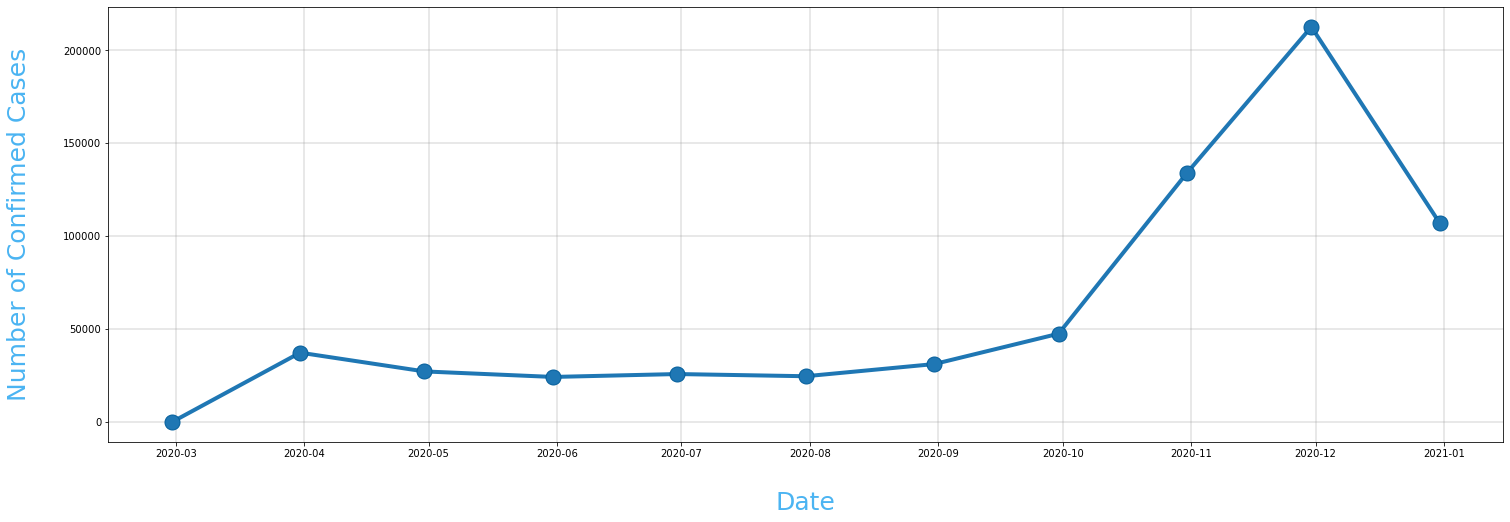

In [8]:
Y = df_aggregated_2020_test['infected']
X = df_aggregated_2020_test['Time']
 
plt.figure(figsize=(25,8))
 
ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f')
 
#ax.set_facecolor("black")
ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
ax.set_ylabel('Number of Confirmed Cases\n',
              size=25,color='#4bb4f2')
 
ax.plot(X,Y,
        color='#1F77B4',
        marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B')

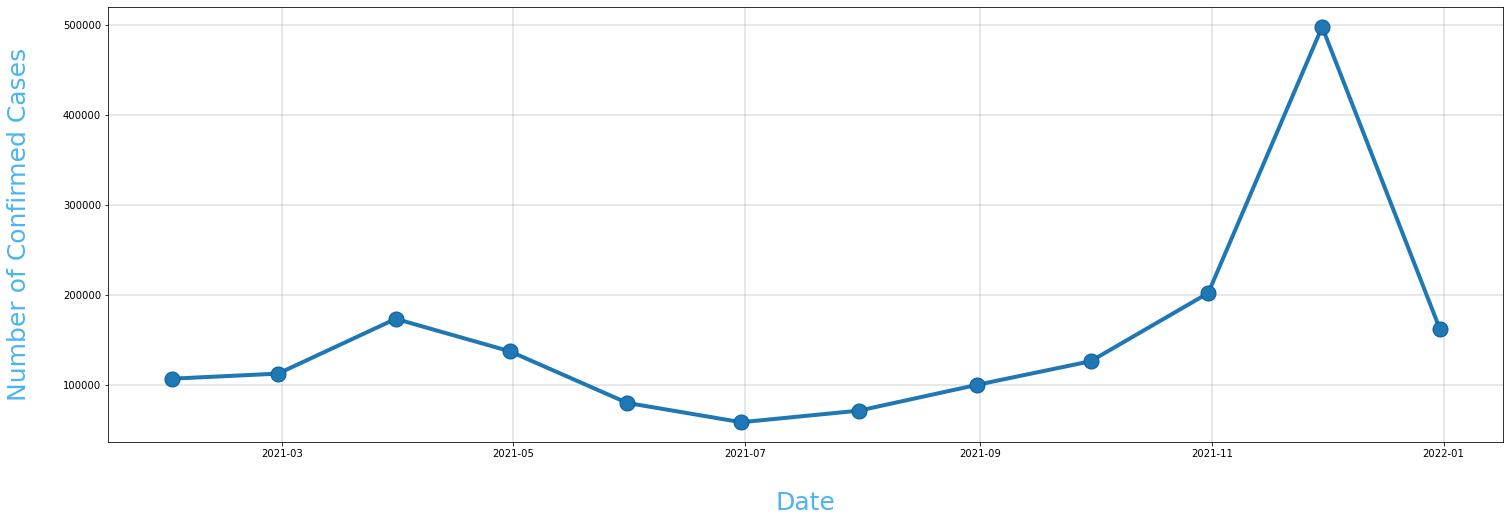

In [9]:
Y = df_aggregated_2021_test['infected']
X = df_aggregated_2021_test['Time']
 
plt.figure(figsize=(25,8))
 
ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f')
 
#ax.set_facecolor("black")
ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
ax.set_ylabel('Number of Confirmed Cases\n',
              size=25,color='#4bb4f2')
 
ax.plot(X,Y,
        color='#1F77B4',
        marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B')

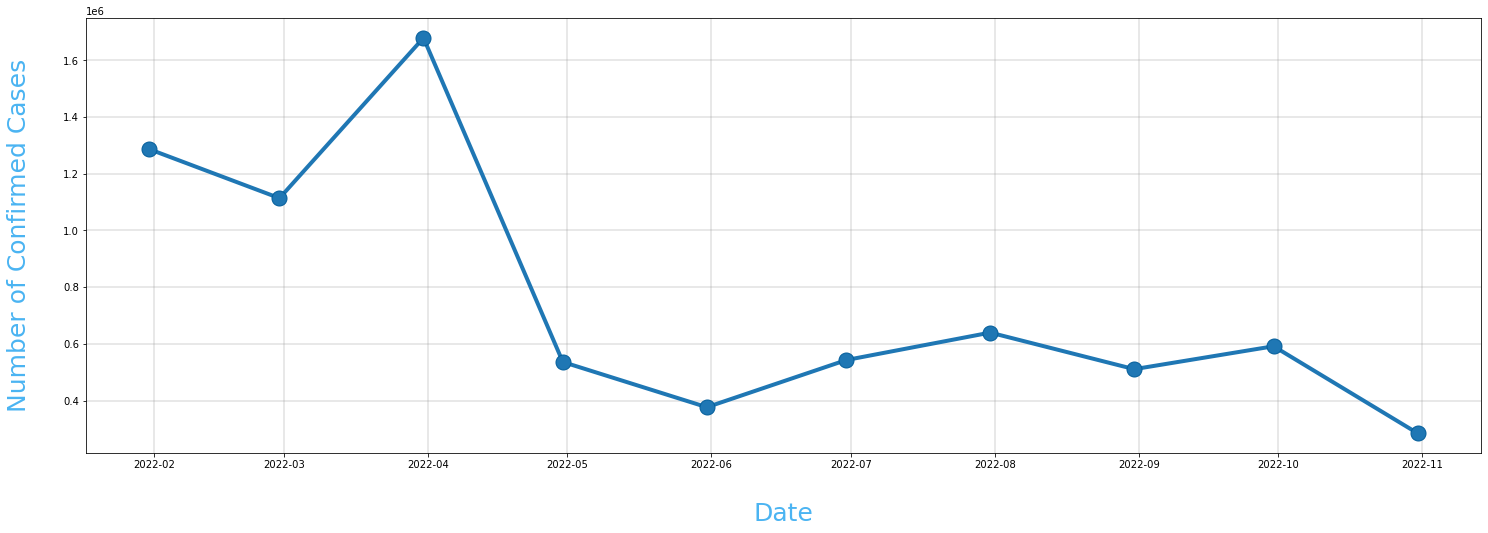

In [11]:
Y = df_aggregated_2022_test['infected']
X = df_aggregated_2022_test['Time']
 
plt.figure(figsize=(25,8))
 
ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f')
 
#ax.set_facecolor("black")
ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
ax.set_ylabel('Number of Confirmed Cases\n',
              size=25,color='#4bb4f2')
 
ax.plot(X,Y,
        color='#1F77B4',
        marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B')

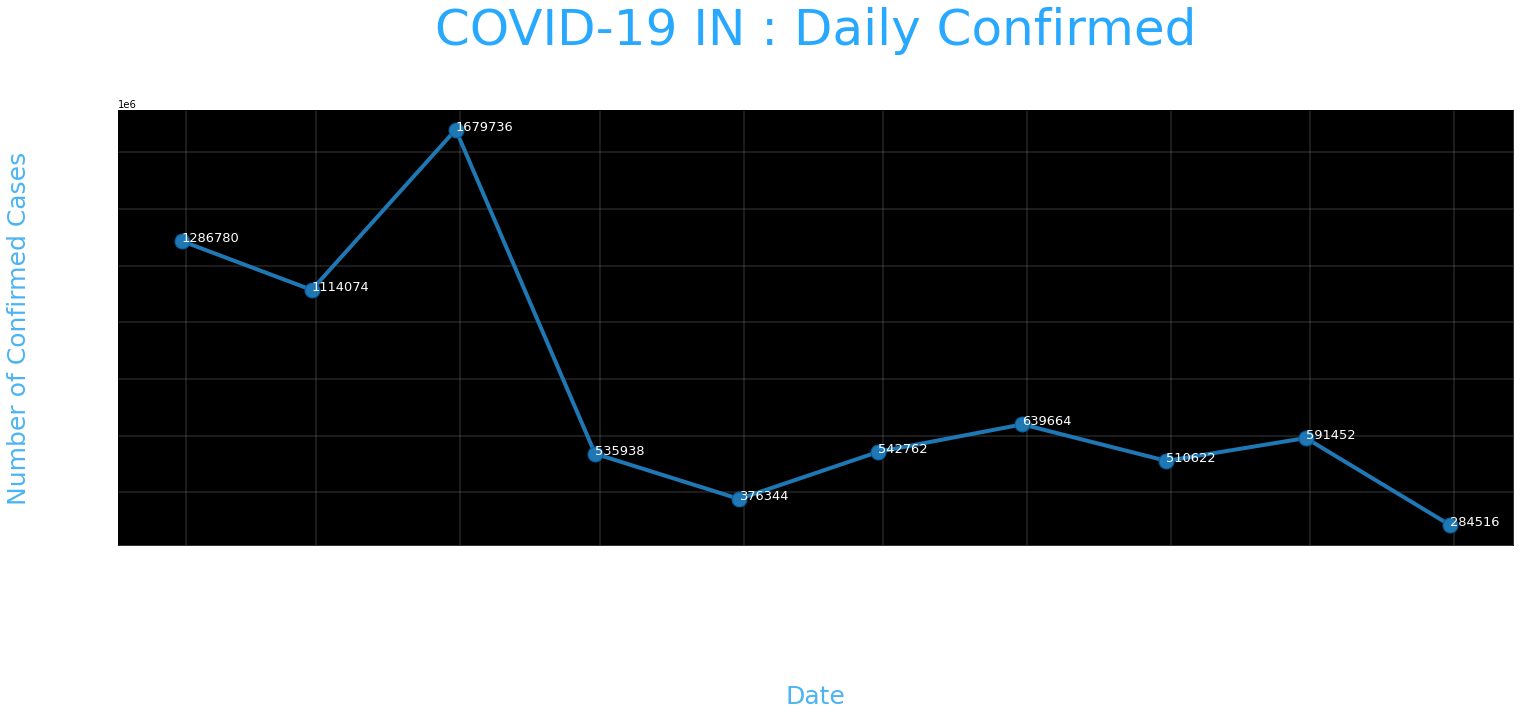

In [12]:
plt.figure(figsize=(25,8))
 
ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f')
 
ax.set_facecolor("black")
ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
ax.set_ylabel('Number of Confirmed Cases\n',
              size=25,color='#4bb4f2')
 
plt.xticks(rotation='vertical',size='20',color='white')
plt.yticks(size=20,color='white')
plt.tick_params(size=20,color='white')
 
for i,j in zip(X,Y):
    ax.annotate(str(j),xy=(i,j+100),color='white',size='13')
     
ax.annotate('Second Lockdown 15th April',
            xy=(15.2, 860),
            xytext=(19.9,500),
            color='white',
            size='25',
            arrowprops=dict(color='white',
                            linewidth=0.025))
 
plt.title("COVID-19 IN : Daily Confirmed\n",
          size=50,color='#28a9ff')
 
ax.plot(X,Y,
        color='#1F77B4',
        marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B')

In [ ]:
df_aggregated_2022_test

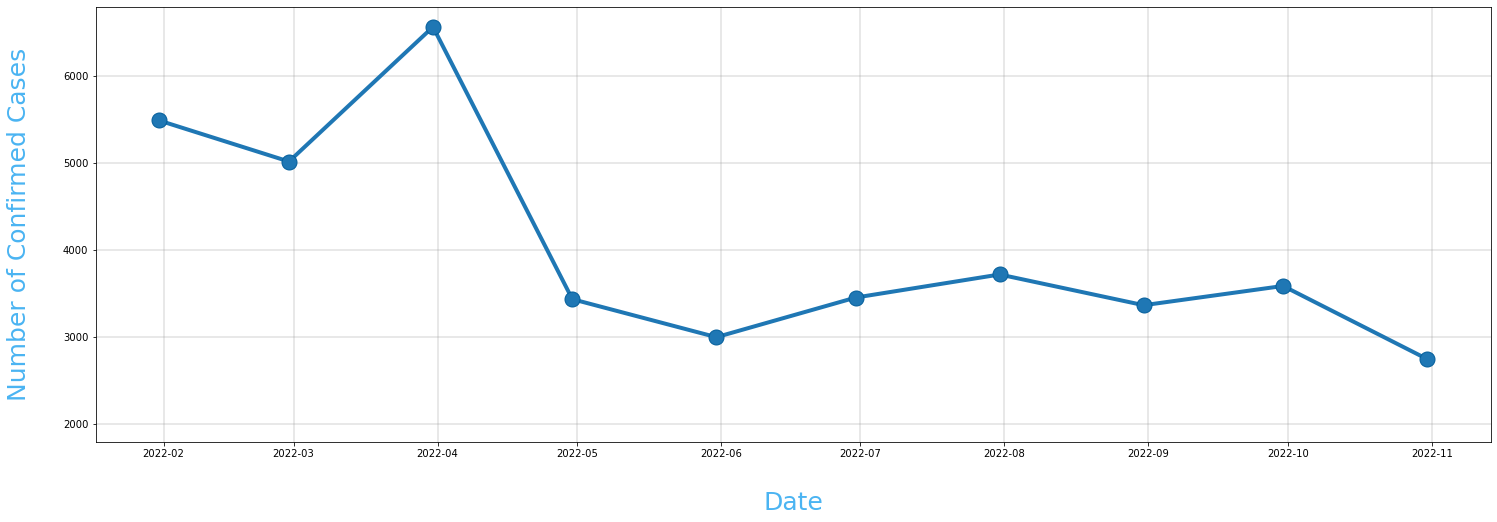

In [20]:
Y = df_aggregated_2022_test['infected']
X = df_aggregated_2022_test['Time']
 
plt.figure(figsize=(25,8))
 
ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f')


for i in df_aggregated_2022_test['Time']:
    ax.axhspan(i,i, facecolor='0.2', alpha=0.5)
    ax.axvspan(i,i, facecolor='b', alpha=0.5)



#ax.set_facecolor("black")
ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
ax.set_ylabel('Number of Confirmed Cases\n',
              size=25,color='#4bb4f2')
 
ax.plot(X,Y,
        color='#1F77B4',
        marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B')